In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")

### Data description

| Feature  | Description            | Notes                                      |
|----------|------------------------|--------------------------------------------|
| survived | Survival               | 0 = No, 1 = Yes                            |
| pclass   | Ticket class           | 1 = 1st, 2 = 2nd, 3 = 3rd                 |
| sex      | Sex                    |                                            |
| Age      | Age in years           |                                            |
| sibsp    | # of siblings / spouses aboard the Titanic |                                    |
| parch    | # of parents / children aboard the Titanic |                                    |
| ticket   | Ticket number          |                                            |
| fare     | Passenger fare         |                                            |
| cabin    | Cabin number           |                                            |
| embarked | Port of Embarkation    | C = Cherbourg, Q = Queenstown, S = Southampton |


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.drop(["PassengerId","Cabin","Name","Ticket"],axis=1, inplace=True)

In [7]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [11]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

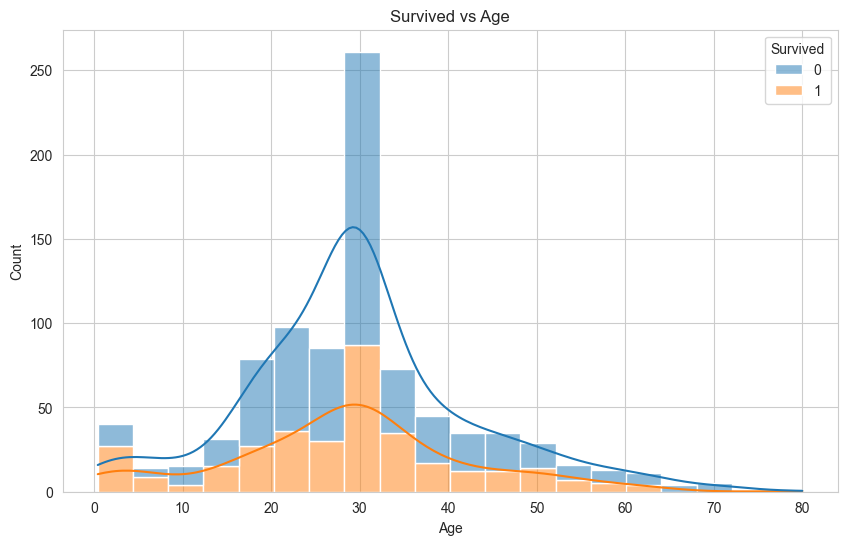

In [15]:
# Set the style of seaborn plots
sns.set_style("whitegrid")

# Histogram: Survived vs Age
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=20, kde=True)
plt.title('Survived vs Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

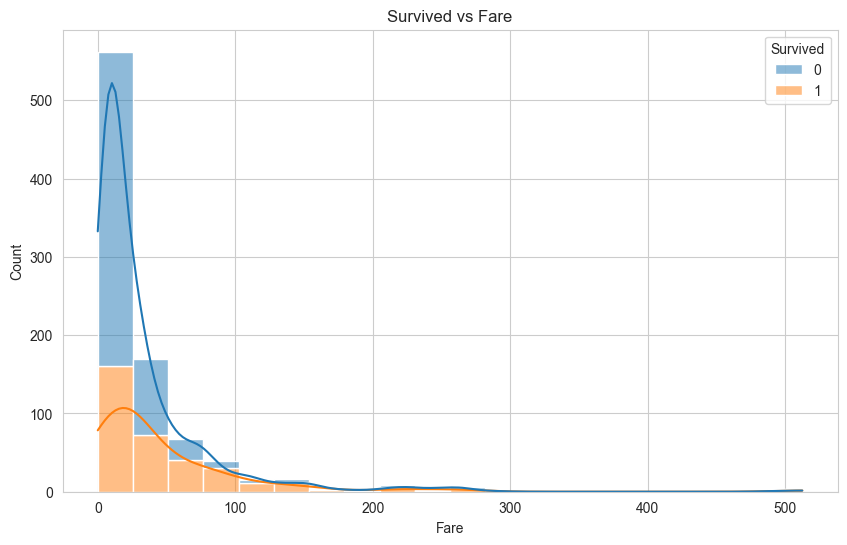

In [16]:
# Histogram: Survived vs Fare
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Fare', hue='Survived', multiple='stack', bins=20, kde=True)
plt.title('Survived vs Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

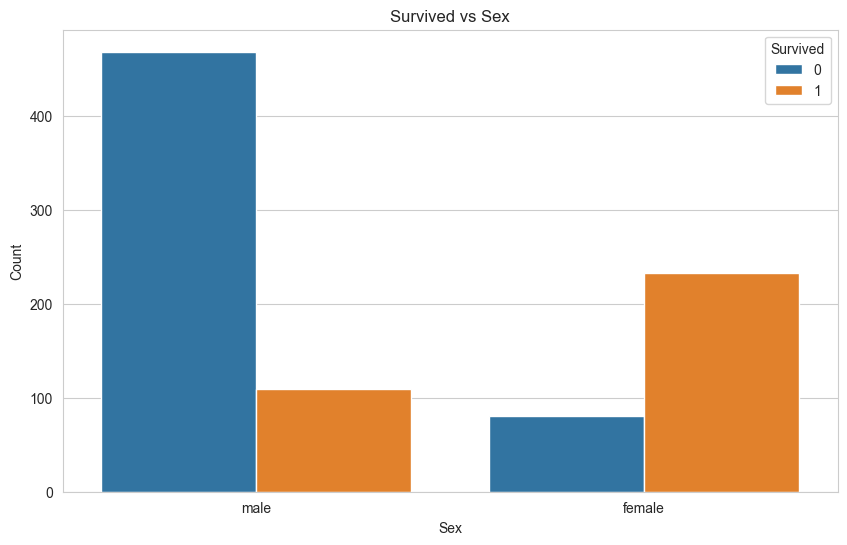

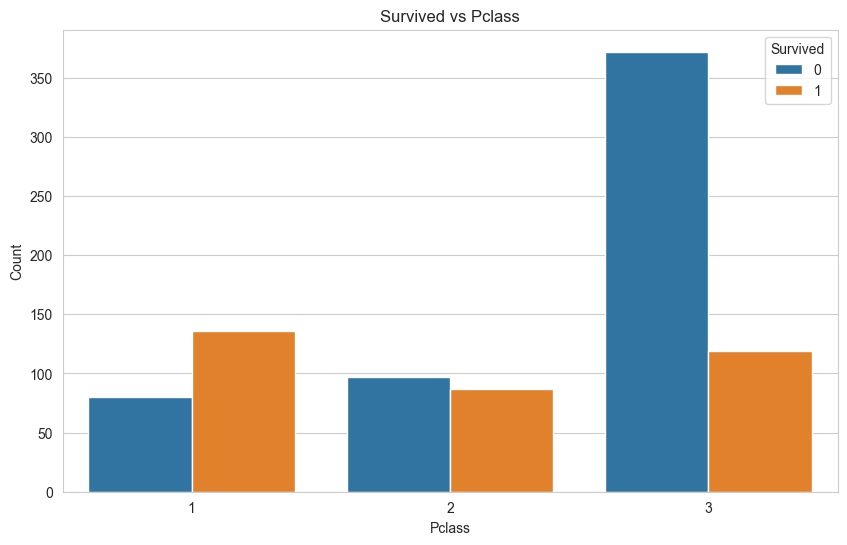

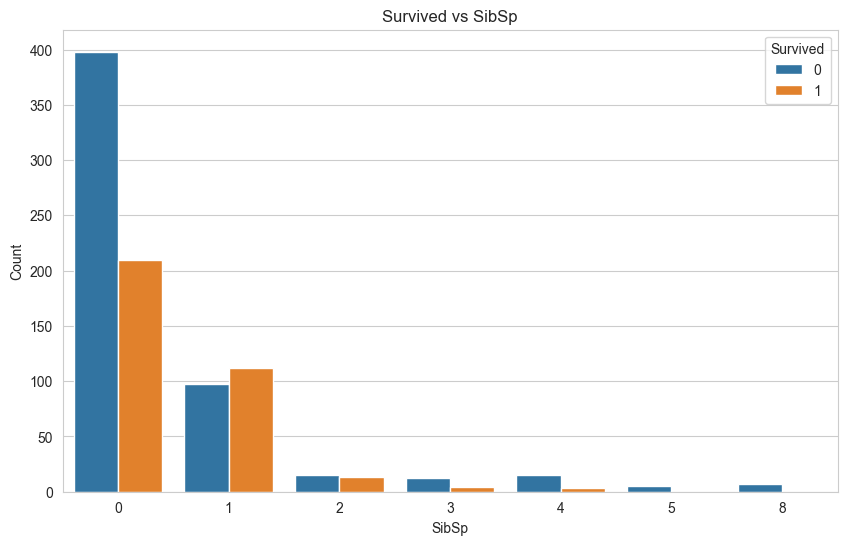

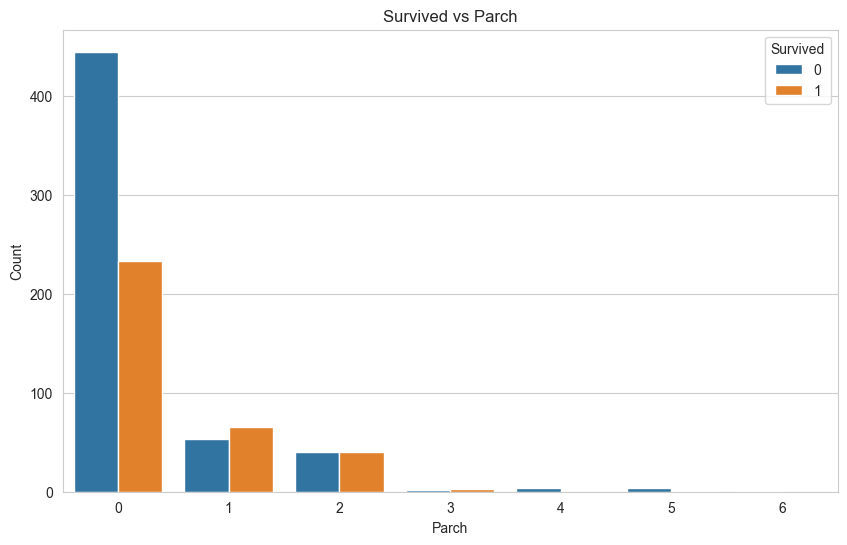

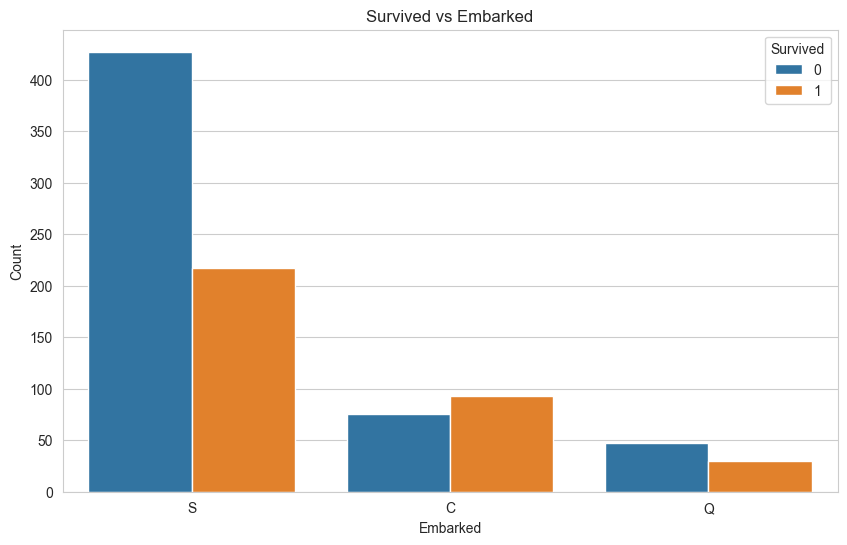

In [17]:
# Define the categorical variables
categorical_vars = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

# Create count plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=var, hue='Survived')
    plt.title(f'Survived vs {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

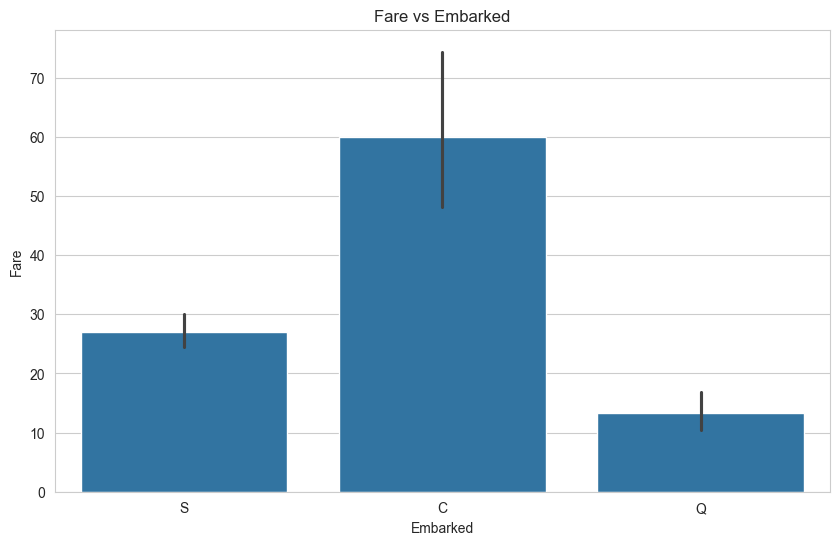

In [18]:
# Bar plot: Fare vs Embarked
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='Embarked', y='Fare')
plt.title('Fare vs Embarked')
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.show()

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
print(train['Sex'].value_counts())
print(train['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train['Sex'] = label_encoder.fit_transform(train['Sex'])
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])

In [22]:
print(train['Sex'].value_counts())
print(train['Embarked'].value_counts())

Sex
1    577
0    314
Name: count, dtype: int64
Embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64


In [23]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [24]:
X=train.drop(["Survived"],axis=1)
y=train['Survived']

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [29]:
model_params = {
    
    'logistic_regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 0.5, 1, 5, 10]
        }
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
    
}


In [30]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

best_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_model

,model,best_score,best_params
0,logistic_regression,0.800561,{'C': 0.1}
1,decision_tree,0.827204,"{'criterion': 'entropy', 'max_depth': 5, 'min_..."


In [31]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix, accuracy_score, precision_score, classification_report

# Retrieve the best model and its parameters from the results
best_model_row = best_model.loc[best_model['best_score'].idxmax()]
best_model_name = best_model_row['model']
best_model_params = best_model_row['best_params']

# Initialize the best model with the best parameters
best_model_selected = model_params[best_model_name]['model']
best_model_selected.set_params(**best_model_params)

best_model_selected.fit(X_train,y_train)
# Make predictions on the test set
y_pred_test = best_model_selected.predict(X_test)

# Evaluate performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics and other relevant information
print("Test Set Accuracy:", accuracy_test)
print("Test Set Precision:", precision_test)
print("Test Set Recall:", recall_test)
print("Test Set F1-Score:", f1_test)
print("Classification Report for Test Set:")
print(report_test)
print("Confusion Matrix for Test Set:")
print(conf_matrix)

Test Set Accuracy: 0.7988826815642458
Test Set Precision: 0.6885245901639344
Test Set Recall: 0.711864406779661
Test Set F1-Score: 0.7
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       120
           1       0.69      0.71      0.70        59

    accuracy                           0.80       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix for Test Set:
[[101  19]
 [ 17  42]]


In [32]:
import pickle

# Save the trained SVM model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model_selected, f)